In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\SRIKAR PILLALAMARRI\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPooling2D

In [3]:
df = pd.read_csv(r'D:\Data Analytics\500+ Data Science Projects\500+ Data Science Projects\1. Heart Failure - Analysis\heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<Axes: >

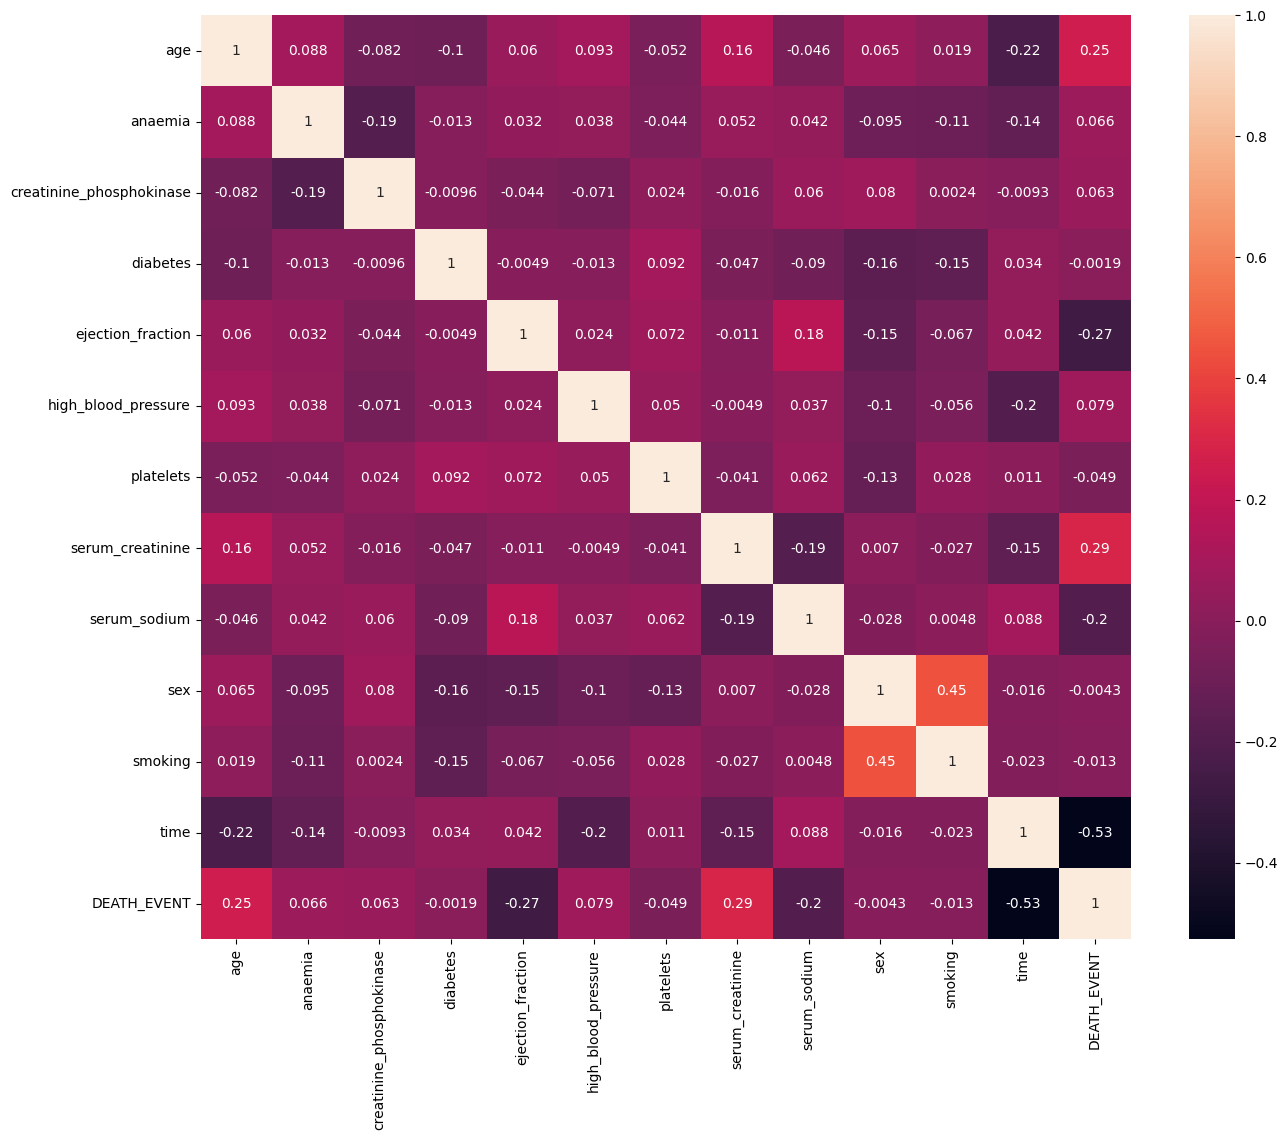

In [9]:
import seaborn as sns
plt.figure(figsize = (15,12))
sns.heatmap(df.corr(), annot = True)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['age'] = scaler.fit_transform(df[['age']])
df['creatinine_phosphokinase'] = scaler.fit_transform(df[['creatinine_phosphokinase']])
df['ejection_fraction'] = scaler.fit_transform(df[['ejection_fraction']])
df['platelets'] = scaler.fit_transform(df[['platelets']])
df['serum_sodium'] = scaler.fit_transform(df[['serum_sodium']])
df['time'] = scaler.fit_transform(df[['serum_sodium']])
df['serum_creatinine'] = scaler.fit_transform(df[['serum_creatinine']])

In [15]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0,0.485714,1
1,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0,0.657143,1
2,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,0.457143,1,1,0.457143,1
3,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,0.685714,1,0,0.685714,1
4,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,0.085714,0,0,0.085714,1


In [17]:
X = df.drop('DEATH_EVENT', axis = 1)
y = df['DEATH_EVENT']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [35]:
classifier = Sequential()
classifier.add(Dense(16, input_dim = 12,activation = 'relu'))
classifier.add(Dense(16, activation = 'relu'))
classifier.add(Dense(8, activation = 'relu'))
classifier.add(Dense(8, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [37]:
from keras import callbacks
early_stopping=callbacks.EarlyStopping(monitor='val_loss',patience=10,min_delta=0.001,restore_best_weights=True)
history = classifier.fit(X_train,y_train,batch_size = 32, epochs = 50, validation_split = 0.2)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3394 - loss: 0.7471 - val_accuracy: 0.2500 - val_loss: 0.7617
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3084 - loss: 0.7374 - val_accuracy: 0.2500 - val_loss: 0.7409
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2969 - loss: 0.7239 - val_accuracy: 0.2500 - val_loss: 0.7246
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4144 - loss: 0.7049 - val_accuracy: 0.4167 - val_loss: 0.7103
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4858 - loss: 0.6994 - val_accuracy: 0.5000 - val_loss: 0.6977
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5503 - loss: 0.6880 - val_accuracy: 0.5417 - val_loss: 0.6865
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6375 - loss: 0.6788 - val_accuracy: 0.6667 - val_loss: 0.6762
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6959 - loss: 0.6671 - val_accuracy: 0.6875 - val_loss: 0.6660
Epoch 9

In [38]:
historydf=pd.DataFrame(history.history)
historydf.head(5)

,accuracy,loss,val_accuracy,val_loss
0,0.308901,0.752261,0.250000,0.761690
1,0.314136,0.734136,0.250000,0.740943
2,0.314136,0.719776,0.250000,0.724576
3,0.387435,0.706789,0.416667,0.710342
4,0.502618,0.696747,0.500000,0.697662


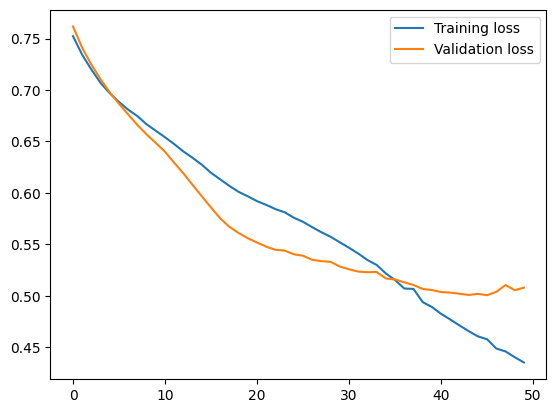

In [39]:
plt.plot(historydf['loss'], label='Training loss')
plt.plot(historydf['val_loss'], label='Validation loss')
plt.legend(loc="best")

In [47]:
test_loss, test_accuracy = classifier.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6743 - loss: 0.6659 


In [48]:
print("Test Loss of the data is: ",test_loss)
print("Test accuracy of the data is: ", test_accuracy)

Test Loss of the data is:  0.6613598465919495
Test accuracy of the data is:  0.6833333373069763
